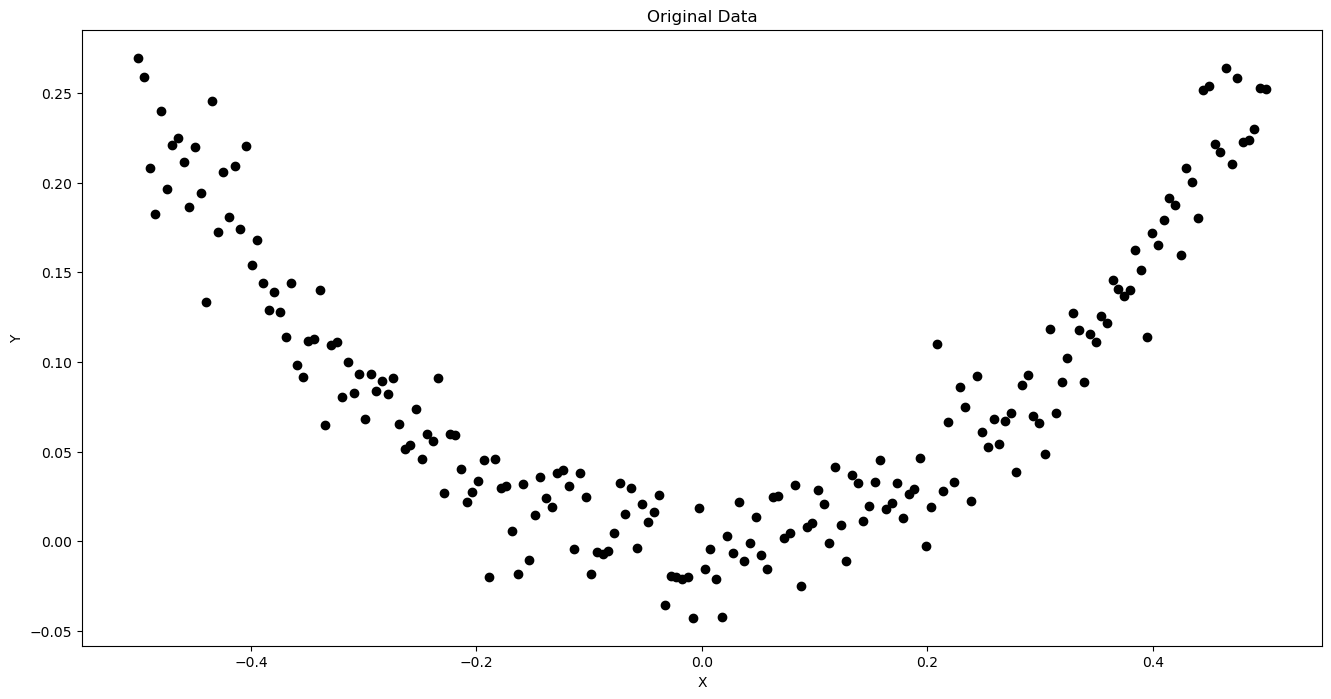

In [46]:
import numpy as np
import matplotlib.pyplot as plt

##################################### generate data points for x and y #########################################################

# x-> an array of 200 equally spaced numbers lies between -0.5 and +0.5. This array is converted to 200x1 2-D array
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
# noise is a set of points which are normally distributed. Mean is 0 and the standard deviation is 0.02. 
# Meaning: noise is nearly 0 but it can vary from + or - 0.02
noise = np.random.normal(0, 0.02, x_data.shape)
# y-> x*x with noise added
y_data = np.square(x_data) + noise

##################################### plot the data in a graph ##################################################################
# Plot x_data and y_data in a scatter plot
plt.figure(figsize=(16, 8))
plt.scatter(
    x_data,
    y_data,
    c='black'
)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Original Data")
plt.show()


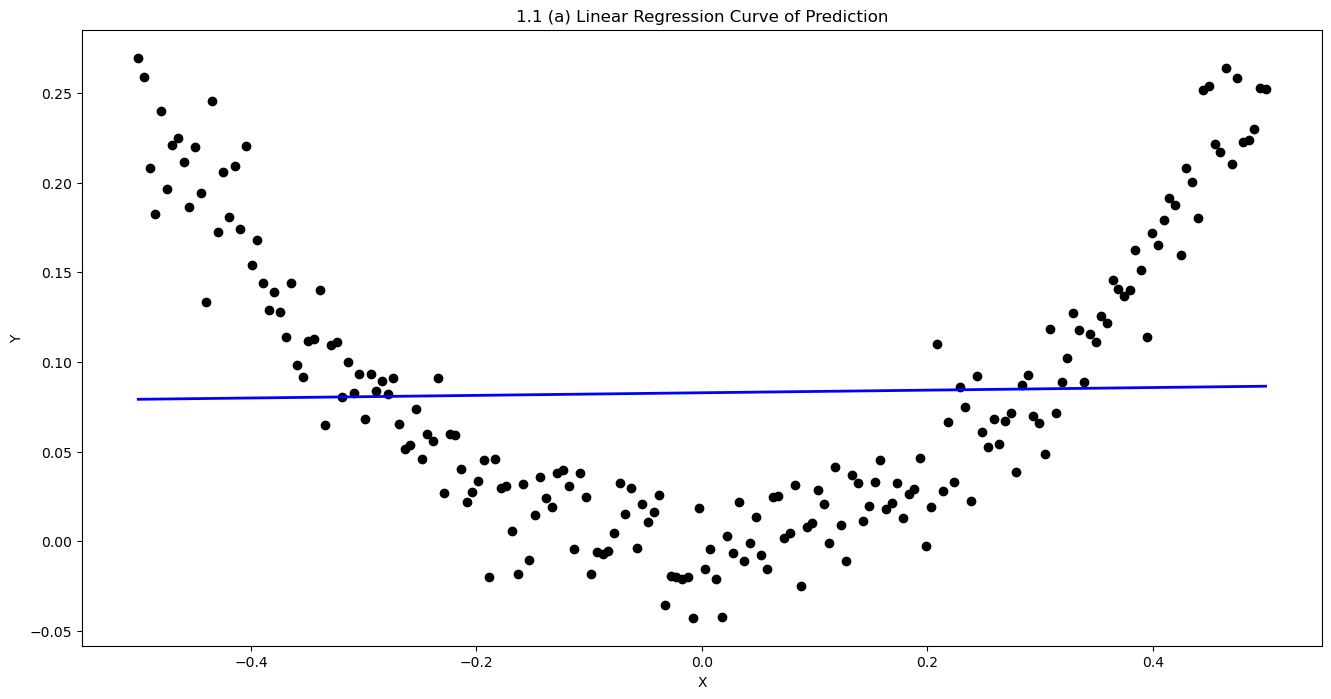

In [76]:
################################# Linear Regression Model #######################################################################
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg=LinearRegression()
#Fit data to a linear model
reg.fit(x_data,y_data)
####################### Plot the linear regression line (1.1 a) ########################################################

# predictions for y, generated from the linear regression model
y_predictions = reg.predict(x_data)

plt.figure(figsize=(16, 8))
plt.scatter(
    x_data,
    y_data,
    c='black'
)
plt.plot(
     x_data,
    y_predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("1.1 (a) Linear Regression Curve of Prediction")
plt.show()


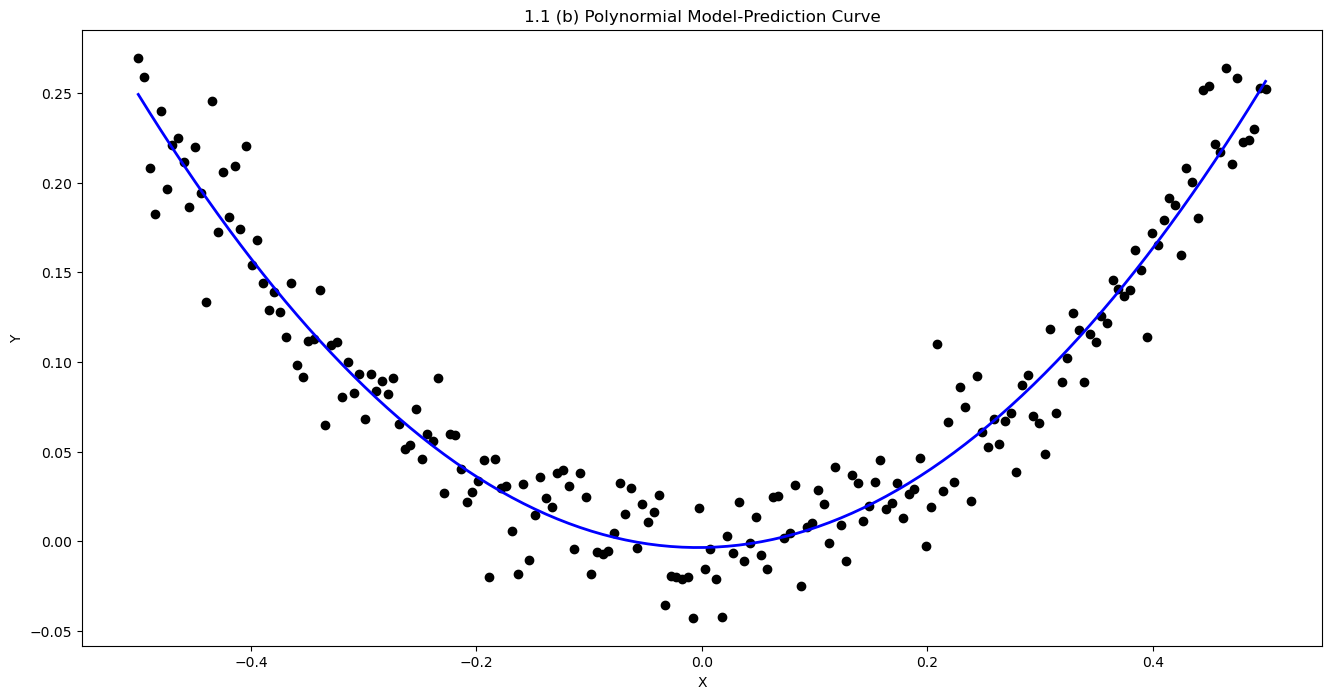

In [73]:
###################### Polynomial Regression Model ############################################################
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the degree of the independent variable, and transform the original features (x_data) into degree 2 polynomial features
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_data)  # Adds x^2 term, intercept, etc.

# Fit x^2 and y into a linear regression relationship

model = LinearRegression()
# Fit the model to the polynomial data
model.fit(x_poly, y_data)

############ Plot the prediction curve for polynomial model 1.1 b ############################################

# predictions for y, generated from the polynomial regression model
y_predictions_poly = model.predict(x_poly)

plt.figure(figsize=(16, 8))
plt.scatter(
    x_data,
    y_data,
    c='black'
)
plt.plot(
     x_data,
    y_predictions_poly,
    c='blue',
    linewidth=2
)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("1.1 (b) Polynormial Model-Prediction Curve")
plt.show()


In [67]:
#################################### Neural Network Model #########################################################

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# split train (80%) and test data (20%)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)

#create the model
model=keras.Sequential()

# input layer, 1 hidden layer with 6 nodes
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

# compile the model which tries to optimize mean sqaured error
optimizer=tensorflow.optimizers.Adam()
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model (the learning algorithm  works through the entire training dataset 500 times)
model_train = model.fit(x_train, y_train, epochs=500, verbose=0, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss= model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 5.1172e-04  
Test Loss: 0.0005178825813345611


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


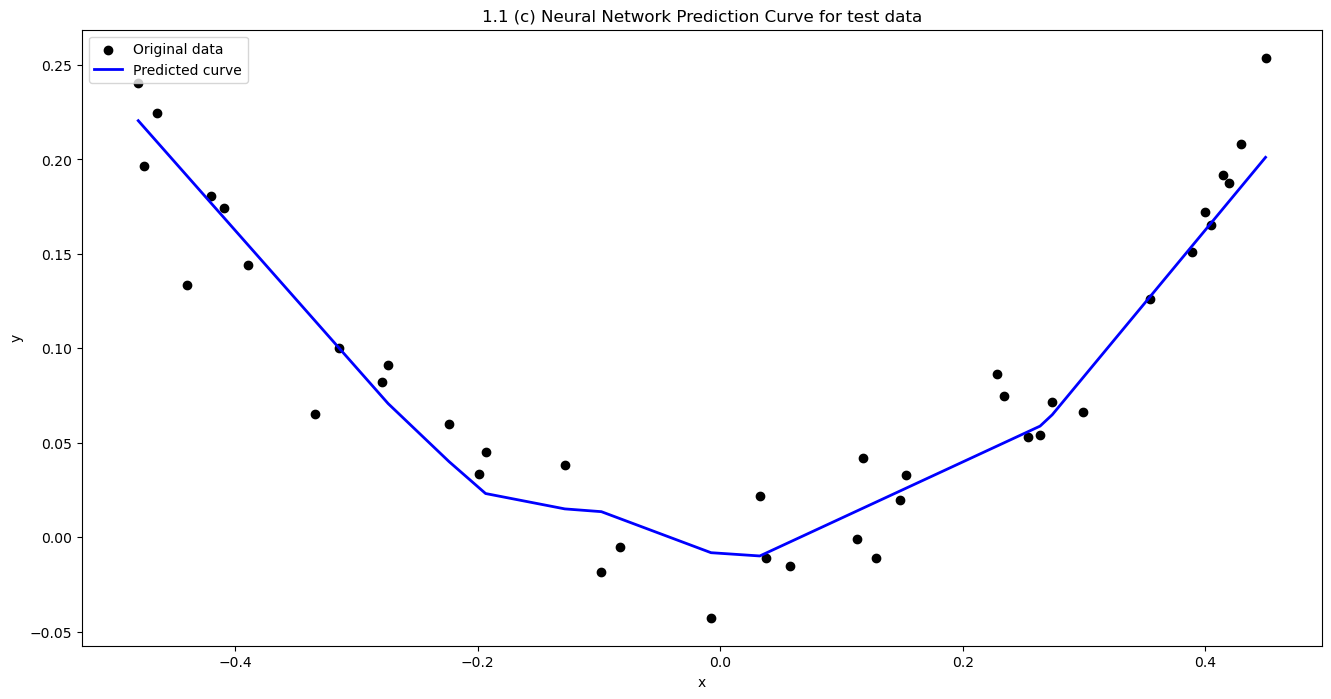

In [68]:
# Make predictions on both training and testing data
y_train_predictions = model.predict(x_train)
y_test_predictions = model.predict(x_test)

# Sort the x_test data and predictions
sorted_idx = np.argsort(x_test[:, 0])
x_test_sorted = x_test[sorted_idx]
y_test_predictions_sorted = y_test_predictions[sorted_idx]

# Plot the test data and predictions - 1.1c
plt.figure(figsize=(16, 8))

# Plot original test data points (scatter)
plt.scatter(x_test, y_test, color='black', label='Original data')

# Plot the predicted curve 
plt.plot(x_test_sorted, y_test_predictions_sorted, color='blue', linewidth=2, label='Predicted curve')

plt.title("1.1 (c) Neural Network Prediction Curve for test data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

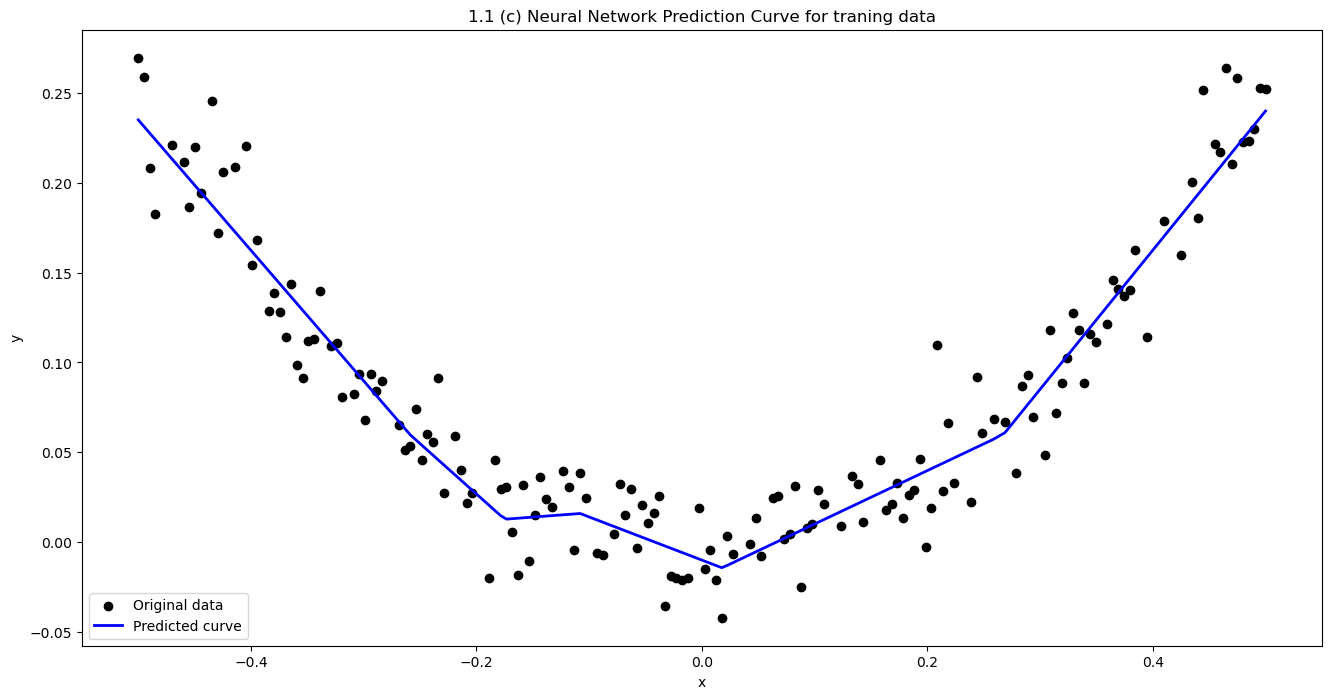

In [69]:
# Sort the x_test data and predictions
sorted_idx = np.argsort(x_train[:, 0])
x_train_sorted = x_train[sorted_idx]
y_train_predictions_sorted = y_train_predictions[sorted_idx]

# Plot the test data and predictions - 1.1c
plt.figure(figsize=(16, 8))

# Plot original test data points (scatter)
plt.scatter(x_train, y_train, color='black', label='Original data')

# Plot the predicted curve 
plt.plot(x_train_sorted, y_train_predictions_sorted, color='blue', linewidth=2, label='Predicted curve')

plt.title("1.1 (c) Neural Network Prediction Curve for traning data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [72]:
rmse= mean_squared_error(y_data, y_predictions)
print(f'Root Mean Squared Error of Linear Regression Model:{rmse}')

Root Mean Squared Error of Linear Regression Model:0.006415708635678608


In [74]:
rmse= mean_squared_error(y_data, y_predictions_poly)
print(f'Root Mean Squared Error of Polynomial Regression Model:{rmse}')

Root Mean Squared Error of Polynomial Regression Model:0.00045247808648254105


In [75]:
rmse = mean_squared_error(y_test, y_test_predictions)
print(f'Root Mean Squared Error of Neural Network Model:{rmse}')

Root Mean Squared Error of Neural Network Model:0.0005178826028678747
